In [305]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import ML modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [306]:
# read Surprise house_dataset dataset
house_dataset = pd.read_csv("train.csv")

# check the first five rows
house_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [307]:
# Summary of the house_dataset dataset
print(house_dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes

In [308]:
# from data dictionary, missing values "NA" has meaning for the below attributes, 
# Replace NA with None to understand attributes with real missing values
lst_1 = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", 
         "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

# replace "NA" with more meaningful "None"
house_dataset[lst_1] = house_dataset[lst_1].fillna("None")

In [309]:
# MSSubClass: Identifies the type of dwelling involved in the sale.
house_dataset['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [310]:
# MSZoning: Identifies the general zoning classification of the sale.
house_dataset['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [311]:
# Street: Type of road access to property - Binary class
# imbalanced data, can remove from analysis
house_dataset['Street'].value_counts()


Pave    1454
Grvl       6
Name: Street, dtype: int64

In [312]:
# Alley: Type of alley access to property
house_dataset['Alley'].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [313]:
# LotShape: General shape of property
house_dataset['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [314]:
# LandContour: Flatness of the property
house_dataset['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [315]:
# Utilities: Type of utilities available
# imbalanced data, can remove from analysis
house_dataset['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [316]:
# LotConfig: Lot configuration
house_dataset['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [317]:
# LandSlope: Slope of property
house_dataset['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [318]:
# Neighborhood: Physical locations within Ames city limits
house_dataset['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [319]:

# Condition1: Proximity to various conditions
house_dataset['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [320]:
# Condition2: Proximity to various conditions (if more than one is present)
# imbalanced data, can remove from analysis
house_dataset['Condition2'].value_counts()

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

In [321]:
# BldgType: Type of dwelling
house_dataset['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [322]:
# HouseStyle: Style of dwelling
house_dataset['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [323]:
# OverallQual: Rates the overall material and finish of the house
house_dataset['OverallQual'].astype('category').value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [324]:
# OverallCond: Rates the overall condition of the house
house_dataset['OverallCond'].astype('category').value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [325]:
# RoofStyle: Type of roof
house_dataset['RoofStyle'].astype('category').value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [326]:
# RoofMatl: Roof material
# imbalanced data, can remove from analysis
house_dataset['RoofMatl'].astype('category').value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [327]:
# Exterior1st: Exterior covering on house
house_dataset['Exterior1st'].astype('category').value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [328]:
# Exterior2nd: Exterior covering on house (if more than one material)
house_dataset['Exterior2nd'].astype('category').value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [329]:
# MasVnrType: Masonry veneer type
house_dataset['MasVnrType'].astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [330]:
# ExterQual: Evaluates the quality of the material on the exterior 
house_dataset['ExterQual'].astype('category').value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [331]:
# ExterCond: Evaluates the present condition of the material on the exterior
house_dataset['ExterCond'].astype('category').value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [332]:
# Foundation: Type of foundation
house_dataset['Foundation'].astype('category').value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [333]:
# BsmtQual: Evaluates the height of the basement
house_dataset['BsmtQual'].astype('category').value_counts()

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64

In [334]:
# BsmtCond: Evaluates the general condition of the basement
house_dataset['BsmtCond'].astype('category').value_counts()

TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64

In [335]:
# BsmtExposure: Refers to walkout or garden level walls
house_dataset['BsmtExposure'].astype('category').value_counts()

No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64

In [336]:
# BsmtFinType1: Rating of basement finished area
house_dataset['BsmtFinType1'].astype('category').value_counts()

Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [337]:
# BsmtFinType2: Rating of basement finished area (if multiple types)
house_dataset['BsmtFinType2'].astype('category').value_counts()

Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64

In [338]:
# Heating: Type of heating
house_dataset['Heating'].astype('category').value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [339]:
# HeatingQC: Heating quality and condition
house_dataset['HeatingQC'].astype('category').value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [340]:
# CentralAir: Central air conditioning
house_dataset['CentralAir'].astype('category').value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [341]:
# Electrical: Electrical system
house_dataset['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [342]:
# KitchenQual: Kitchen quality
house_dataset['KitchenQual'].astype('category').value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [343]:
# Functional: Home functionality (Assume typical unless deductions are warranted)
house_dataset['Functional'].astype('category').value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [344]:
# FireplaceQu: Fireplace quality
house_dataset['FireplaceQu'].astype('category').value_counts()

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [345]:
# GarageType: Garage location
house_dataset['GarageType'].astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [346]:
# GarageFinish: Interior finish of the garage
house_dataset['GarageFinish'].astype('category').value_counts()

Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64

In [347]:
# GarageQual: Garage quality
house_dataset['GarageQual'].astype('category').value_counts()

TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: GarageQual, dtype: int64

In [348]:
# GarageCond: Garage condition
house_dataset['GarageCond'].astype('category').value_counts()

TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64

In [349]:
# PavedDrive: Paved driveway
house_dataset['PavedDrive'].astype('category').value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [350]:
# PoolQC: Pool quality
# very few houses have pools, take judgment during analysis
house_dataset['PoolQC'].astype('category').value_counts()

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

In [351]:
# Fence: Fence quality
house_dataset['Fence'].astype('category').value_counts()

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [352]:
# MiscFeature: Miscellaneous feature not covered in other categories
house_dataset['MiscFeature'].astype('category').value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [353]:

# SaleType: Type of sale
house_dataset['SaleType'].astype('category').value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [354]:
# SaleCondition: Condition of sale
house_dataset['SaleCondition'].astype('category').value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

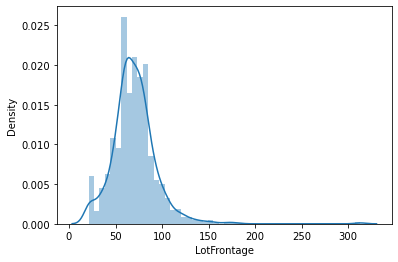

In [355]:
# LotFrontage: Linear feet of street connected to property
sns.distplot(house_dataset['LotFrontage'])
plt.show()

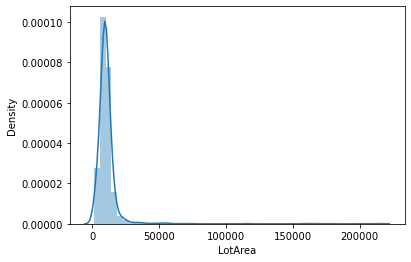

In [356]:
# LotArea: Lot size in square feet
sns.distplot(house_dataset['LotArea'])
plt.show()

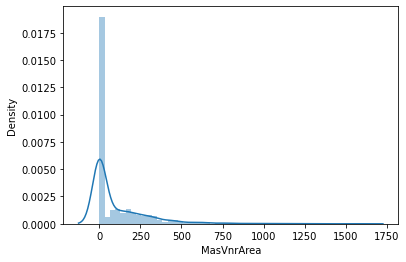

In [357]:
# MasVnrArea: Masonry veneer area in square feet
sns.distplot(house_dataset['MasVnrArea'])
plt.show()

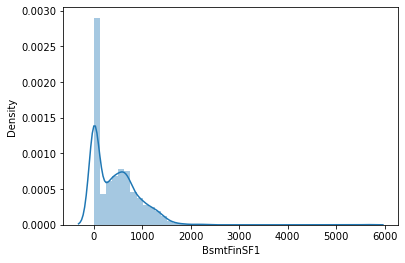

In [358]:
# BsmtFinSF1: Type 1 finished square feet
sns.distplot(house_dataset['BsmtFinSF1'])
plt.show()

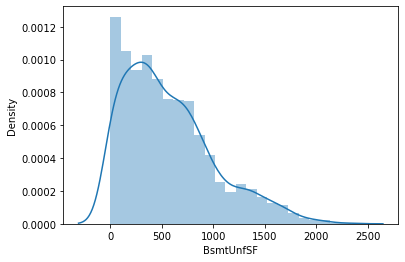

In [359]:
# BsmtUnfSF: Unfinished square feet of basement area
sns.distplot(house_dataset['BsmtUnfSF'])
plt.show()

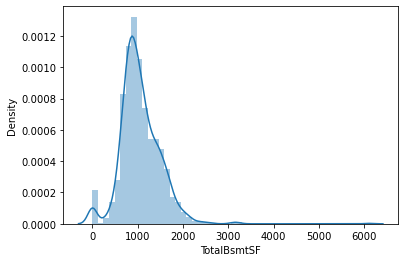

In [360]:
# TotalBsmtSF: Total square feet of basement area
sns.distplot(house_dataset['TotalBsmtSF'])
plt.show()

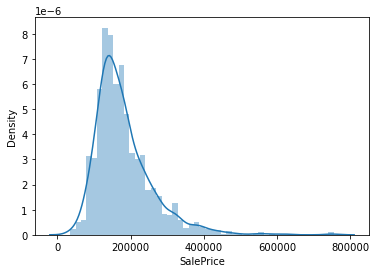

In [361]:
# Target variable: SalePrice
sns.distplot(house_dataset['SalePrice'])
plt.show()

In [362]:
#house_dataset["SalePrice"] = np.log(house_dataset["SalePrice"])

# Data Exploration

## subset the list of all independent numeric variables 


In [363]:
# select all numeric (float and int) variables in the dataset
house_dataset_numeric = house_dataset.select_dtypes(include=['float64', 'int64'])

# drop id as it is not useful in analysis
house_dataset_numeric = house_dataset_numeric.drop("Id", axis=1)

house_dataset_numeric.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [364]:
#Pairwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(house_dataset_numeric)
plt.show()

In [365]:
# Correlation matrix
corr = house_dataset_numeric.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


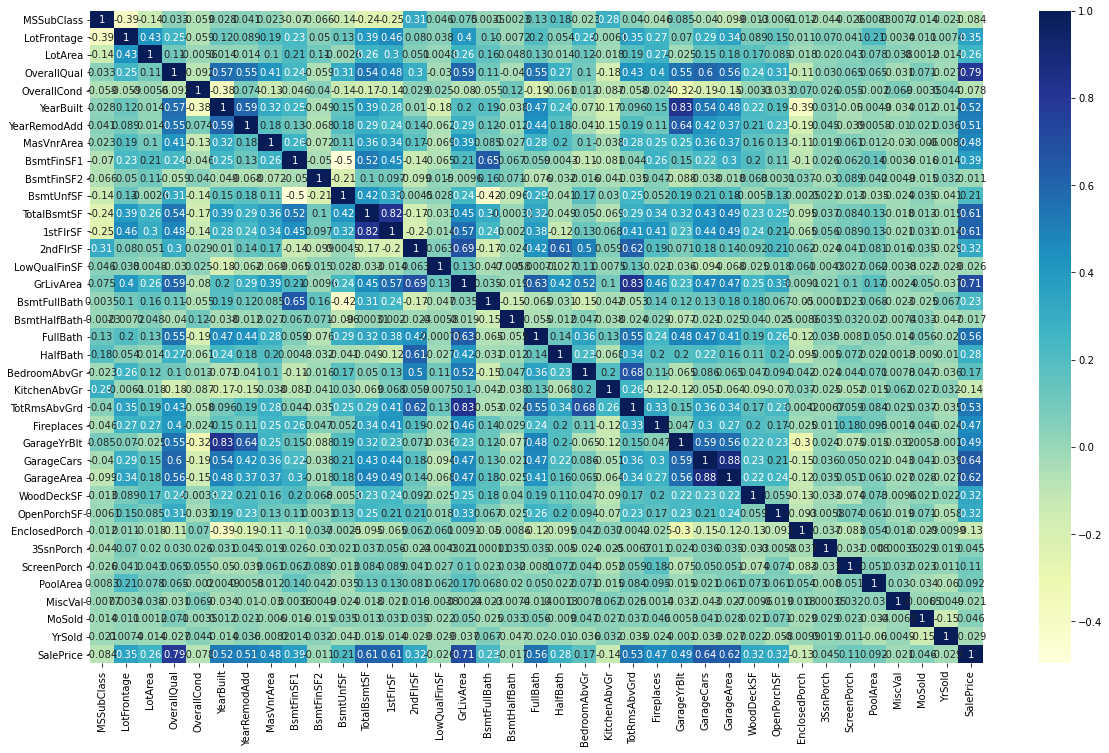

In [366]:
# Figure size
plt.figure(figsize=(20,12))

# Heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

# Observations
## 2. Data Cleaning


In [367]:
# # Summary of the house_dataset dataset
print(house_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [368]:
# check for any outliers
house_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [369]:
# impute LotFrontage missing values with median
house_dataset["LotFrontage"] = house_dataset["LotFrontage"].fillna(house_dataset['LotFrontage'].median())

In [370]:
# replace MasVnrType with mode "None" and MasVnrArea with zero
house_dataset['MasVnrType'] = house_dataset['MasVnrType'].fillna("None")
house_dataset['MasVnrArea'] = house_dataset['MasVnrArea'].fillna(0)

In [371]:
# replace Electrical with mode "SBrkr"
house_dataset['Electrical'] = house_dataset['Electrical'].fillna("SBrkr")

In [372]:
# remove imbalanced datasets - Street, Utilities, Condition2, RoofMatl
# remove GarageYrBlt which is highly correlated with YearBuilt
# remove MoSold as we consider only years in analysis


delete_list = ["Id", "Street", "Utilities", "GarageYrBlt", "MoSold", "BsmtFinSF2", "MiscFeature", "MiscVal", 
               "EnclosedPorch", "3SsnPorch", "ScreenPorch"]
house_dataset.drop(delete_list, axis = 1, inplace = True)


# 3. Data Preparation

In [373]:
house_dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,PoolQC,Fence,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,...,Y,0,61,0,None,None,2008,WD,Normal,208500
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,...,Y,298,0,0,None,None,2007,WD,Normal,181500
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,...,Y,0,42,0,None,None,2008,WD,Normal,223500
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,...,Y,0,35,0,None,None,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,...,Y,192,84,0,None,None,2008,WD,Normal,250000


In [374]:
# Binary class variable "CentralAir", map to 0 and 1
house_dataset["CentralAir"]=house_dataset["CentralAir"].map({'Y':1,'N':0})

In [375]:
# A function to map the categorical levels to actual numbers.
def mapping(x):
    return x.map({'None': 0, 'Po': 1, 'No': 1, "Fa": 2, "Mn": 2, "TA": 3, "Av": 3, "Gd": 4, "Ex": 5})

# Applying the function to the two columns
# 
lst_2 = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual',
         'GarageCond', 'PoolQC','BsmtExposure']
house_dataset[lst_2] = house_dataset[lst_2].apply(mapping)

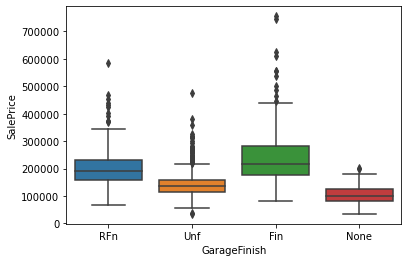

In [376]:
sns.boxplot(x="GarageFinish", y="SalePrice", data=house_dataset)
plt.show()

In [377]:
house_dataset["GarageFinish"]=house_dataset["GarageFinish"].map({'None':0, 'Unf':1, 'RFn':2, 'Fin':3})
house_dataset["Fence"]=house_dataset["Fence"].map({'None':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4})
house_dataset["Electrical"]=house_dataset["Electrical"].map({'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})

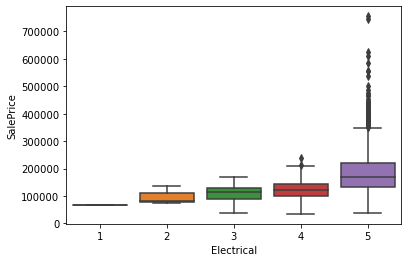

In [378]:
sns.boxplot(x="Electrical", y="SalePrice", data=house_dataset)
plt.show()

In [379]:
house_dataset["PavedDrive"]=house_dataset["PavedDrive"].map({'N':1, 'P':2, 'Y':3})

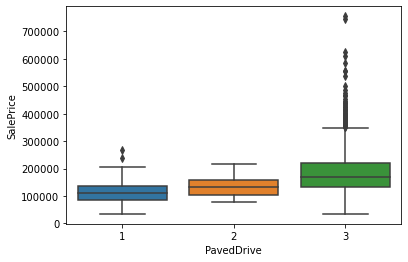

In [380]:
sns.boxplot(x="PavedDrive", y="SalePrice", data=house_dataset)
plt.show()

In [381]:
# Add derived columns for house age and remodel age from YearBuilt, YearRemodAdd, YrSold
house_dataset["HouseAge"] = house_dataset["YrSold"] - house_dataset["YearBuilt"]
house_dataset["HouseRemodelAge"] = house_dataset["YrSold"] - house_dataset["YearRemodAdd"]

#from datetime import datetime
#house_dataset["HouseAge"] = house_dataset["YearBuilt"].apply(lambda x: (datetime.now().year - x))
#house_dataset["HouseRemodelAge"] = house_dataset["YearRemodAdd"].apply(lambda x: (datetime.now().year - x))

# drop columns YearBuilt, YearRemodAdd, YrSold
house_dataset.drop(["YearBuilt", "YearRemodAdd", "YrSold"], axis = 1, inplace = True)


### create dummy variables for the categorical variables

In [382]:
# Subset all categorical variables
house_dataset_categorical = house_dataset.select_dtypes(include=['object'])
house_dataset_categorical.head()

,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,Exterior2nd,MasVnrType,Foundation,BsmtFinType1,BsmtFinType2,Heating,Functional,GarageType,SaleType,SaleCondition
0,RL,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,VinylSd,BrkFace,PConc,GLQ,Unf,GasA,Typ,Attchd,WD,Normal
1,RL,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,MetalSd,None,CBlock,ALQ,Unf,GasA,Typ,Attchd,WD,Normal
2,RL,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,VinylSd,BrkFace,PConc,GLQ,Unf,GasA,Typ,Attchd,WD,Normal
3,RL,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Wd Shng,None,BrkTil,ALQ,Unf,GasA,Typ,Detchd,WD,Abnorml
4,RL,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,VinylSd,BrkFace,PConc,GLQ,Unf,GasA,Typ,Attchd,WD,Normal


In [383]:
# encoding multi class variables , Convert into dummies
house_dataset_dummies = pd.get_dummies(house_dataset_categorical, drop_first=True)
house_dataset_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [384]:
# Drop categorical variable columns
house_dataset_final = house_dataset.drop(list(house_dataset_categorical.columns), axis=1)

# Concatenate dummy variables
house_dataset_final = pd.concat([house_dataset_final, house_dataset_dummies], axis=1)

In [385]:
house_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 204 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(43), uint8(159)
memory usage: 740.1 KB


In [386]:
# check the first few rows
house_dataset_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,4,3,4,3,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,3,3,4,3,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,4,3,4,3,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,3,3,3,4,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,4,3,4,3,...,0,0,0,0,1,0,0,0,1,0


# 4. Model Building using RFE and Model Evaluation

In [387]:
# Split the datafram into train and test sets
df_train, df_test = train_test_split(house_dataset_final, train_size=0.7, test_size=0.3, random_state=100)

In [388]:

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
df1 = house_dataset.drop(list(house_dataset_categorical.columns), axis=1)
varlist = list(df1.columns)

# remove binary class variable
#varlist.remove('CentralAir')
print(varlist)

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'PoolQC', 'Fence', 'SalePrice', 'HouseAge', 'HouseRemodelAge']


In [389]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657071,-0.115302,-0.473765,-0.779861,0.383154,-0.558025,-0.698260,-0.260816,-0.532226,0.123940,...,0,0,0,0,1,0,0,0,1,0
318,0.035976,0.926898,-0.056845,0.649651,-0.533005,0.809137,1.053395,-0.260816,0.579028,0.123940,...,0,0,0,0,1,0,0,0,1,0
239,-0.195040,-0.794998,-0.169324,-0.065105,-1.449164,-0.558025,-0.698260,-0.260816,-0.532226,-1.609519,...,0,0,0,0,1,0,0,0,1,0
986,-0.195040,-0.477806,-0.502297,-0.065105,2.215472,-0.558025,-0.698260,2.602556,-0.532226,-1.609519,...,0,0,0,0,1,0,0,0,1,0
1416,3.039179,-0.432493,0.082905,-1.494617,0.383154,-0.558025,-0.698260,-0.260816,-0.532226,0.123940,...,0,0,0,0,1,0,0,0,1,0


In [390]:
# Split the train dataset into X and y
y_train = df_train.pop('SalePrice')
X_train = df_train

In [391]:
# Import RFE
from sklearn.feature_selection import RFE
topNFeatures = 30

# RFE with features
lm = LinearRegression()
rfe1 = RFE(lm, topNFeatures)

# Fit rfe
rfe1.fit(X_train, y_train)

# Print the boolean results
#print(rfe1.support_)           
#print(rfe1.ranking_)

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [392]:
col = X_train.columns[rfe1.support_]
col

Index(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Condition2_PosN',
       'Condition2_RRAe', 'BldgType_Duplex', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_CBlock',
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_Other',
       'BsmtFinType1_None', 'BsmtFinType2_None', 'Heating_OthW',
       'Functional_Mod', 'Functional_Sev', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [393]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Neighborhood_NoRidge,Neighborhood_NridgHt,Condition2_PosN,Condition2_RRAe,...,Exterior2nd_AsphShn,Exterior2nd_CBlock,Exterior2nd_Other,BsmtFinType1_None,BsmtFinType2_None,Heating_OthW,Functional_Mod,Functional_Sev,SaleType_New,SaleCondition_Partial
210,1.0,-0.430911,-0.765065,-0.787597,-0.124502,-1.228053,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,1.0,0.621579,0.511914,2.140556,-0.124502,2.123103,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,1.0,-0.712011,-0.930972,0.795996,-0.124502,-0.056465,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,1.0,-1.256778,-0.420683,0.669584,-0.124502,0.221858,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1416,1.0,-0.620490,0.195183,1.611926,-0.124502,1.453624,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [394]:
# Fitting the model with selected variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     163.4
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        03:53:33   Log-Likelihood:                -616.50
No. Observations:                1021   AIC:                             1285.
Df Residuals:                     995   BIC:                             1413.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -9.83

# Residual Analysis

Text(0.5, 0, 'Errors')

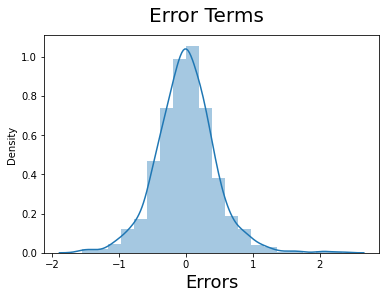

In [395]:
# Predict SalePrice for train data 
y_train_price = lm1.predict(X_train_rfe1)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [396]:
# scale test data
df_test[varlist] = scaler.transform(df_test[varlist])

# Split the 'df_test' set into X and y
y_test = df_test.pop('SalePrice')
X_test = df_test

# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe1 = X_test[col1]

In [397]:
# Add a constant to the test set created
X_test_rfe1 = sm.add_constant(X_test_rfe1)
X_test_rfe1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 1436 to 266
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  438 non-null    float64
 1   TotalBsmtSF            438 non-null    float64
 2   1stFlrSF               438 non-null    float64
 3   2ndFlrSF               438 non-null    float64
 4   LowQualFinSF           438 non-null    float64
 5   GrLivArea              438 non-null    float64
 6   Neighborhood_NoRidge   438 non-null    uint8  
 7   Neighborhood_NridgHt   438 non-null    uint8  
 8   Condition2_PosN        438 non-null    uint8  
 9   Condition2_RRAe        438 non-null    uint8  
 10  BldgType_Duplex        438 non-null    uint8  
 11  RoofStyle_Shed         438 non-null    uint8  
 12  RoofMatl_CompShg       438 non-null    uint8  
 13  RoofMatl_Membran       438 non-null    uint8  
 14  RoofMatl_Metal         438 non-null    uint8  
 15  Roo

Text(0, 0.5, 'y_pred')

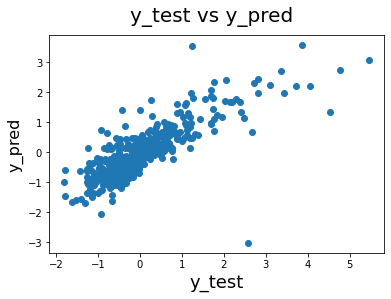

In [398]:
# Making predictions
y_pred = lm1.predict(X_test_rfe1)

# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [399]:
# r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6610883680930568


# 5. Perform Ridge and Lasso regression to select optimal value of lambda
## Ridge Regression

In [400]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  

# Subsetting training data for selected columns
X_train_rfe2 = X_train[col1]

model_cv.fit(X_train_rfe2, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [401]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010730,0.003080,0.004621,0.003920,0.0001,{'alpha': 0.0001},-0.340516,-0.379862,-0.395787,-0.400134,...,-0.373168,0.024116,25,-0.325808,-0.328579,-0.327939,-0.328088,-0.326730,-0.327429,0.001013
1,0.006243,0.007646,0.006250,0.007654,0.001,{'alpha': 0.001},-0.340493,-0.379853,-0.395572,-0.399653,...,-0.373018,0.023978,24,-0.325848,-0.328594,-0.327924,-0.328069,-0.326784,-0.327444,0.000993
2,0.011897,0.003757,0.005296,0.004936,0.01,{'alpha': 0.01},-0.340294,-0.379766,-0.393622,-0.395264,...,-0.371672,0.022732,23,-0.326483,-0.328741,-0.328025,-0.328040,-0.327435,-0.327745,0.000755
3,0.009381,0.007660,0.006250,0.007654,0.05,{'alpha': 0.05},-0.340638,-0.379423,-0.389096,-0.383804,...,-0.368709,0.019364,21,-0.330369,-0.329341,-0.330713,-0.330393,-0.331214,-0.330406,0.000614
4,0.006250,0.007654,0.006250,0.007655,0.1,{'alpha': 0.1},-0.342612,-0.379065,-0.386695,-0.377032,...,-0.367410,0.017110,20,-0.334124,-0.330005,-0.334000,-0.333498,-0.335056,-0.333336,0.001740


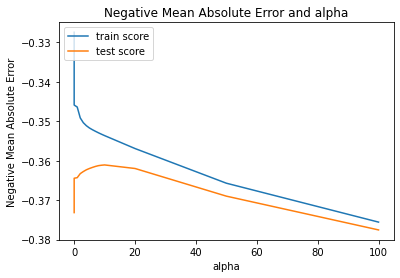

In [402]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [403]:
# print optimal lambda for ridge
model_cv.best_params_["alpha"]

10.0

In [404]:
# Get Ridge coeffs for optimal lambda
alpha = model_cv.best_params_["alpha"]
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe2, y_train)
ridge.coef_

array([ 0.24399788,  0.1939189 ,  0.17002209, -0.077443  ,  0.27716889,
        0.67457083,  0.71254011, -0.40968846, -0.05316314, -0.45017242,
        0.04032123,  0.10650213,  0.10770014,  0.0667934 , -0.01799191,
       -0.03734044,  0.03995348,  0.46684068, -0.01646994, -0.05051003,
       -0.01646994, -0.05051003,  0.        ,  0.07196248,  0.00894846,
       -0.07322139, -0.28794486, -0.11207554,  0.22690378,  0.22690378])

In [405]:
# train and test data R2 score
Ridge_train_score = ridge.score(X_train_rfe2, y_train)
print("Ridge_train_score: ", Ridge_train_score)

# Subsetting training data for selected columns
X_test_rfe2 = X_test[col1]
Ridge_test_score = ridge.score(X_test_rfe2, y_test)
print("Ridge_test_score: ", Ridge_test_score)

Ridge_train_score:  0.7009069535125008
Ridge_test_score:  0.7163386154256813


In [406]:
def sortTopFeaturesinDescendingOrder(s):

    li=[]  
    for i in range(len(s)): 
          li.append([abs(s[i]), i]) 
    li.sort(reverse=True) 
    sort_index = [] 

    for x in li: 
          sort_index.append(x[1]) 

    return sort_index

sorted_index = sortTopFeaturesinDescendingOrder(list(ridge.coef_))
print(sorted_index)

# print top features using Ridge regression for optimal lamda
print(col1[sorted_index])

[6, 5, 17, 9, 7, 26, 4, 0, 29, 28, 1, 2, 27, 12, 11, 3, 25, 23, 13, 8, 21, 19, 10, 16, 15, 14, 18, 20, 24, 22]
Index(['Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'RoofMatl_WdShngl',
       'BldgType_Duplex', 'Condition2_PosN', 'Functional_Mod', 'GrLivArea',
       'TotalBsmtSF', 'SaleCondition_Partial', 'SaleType_New', '1stFlrSF',
       '2ndFlrSF', 'Functional_Sev', 'RoofMatl_Membran', 'RoofMatl_CompShg',
       'LowQualFinSF', 'Heating_OthW', 'BsmtFinType1_None', 'RoofMatl_Metal',
       'Condition2_RRAe', 'Exterior2nd_CBlock', 'Exterior1st_CBlock',
       'RoofStyle_Shed', 'RoofMatl_WdShake', 'RoofMatl_Tar&Grv',
       'RoofMatl_Roll', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn',
       'BsmtFinType2_None', 'Exterior2nd_Other'],
      dtype='object')



# Check the model changes for the double value of Optimal lambda

In [407]:
# Get Ridge coeffs for double the value of optimal lambda
alpha = 2*model_cv.best_params_["alpha"]
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe2, y_train)
ridge.coef_

array([ 0.2533643 ,  0.19294328,  0.1739431 , -0.07807107,  0.27959029,
        0.53493393,  0.61279748, -0.21708856, -0.03151969, -0.37543389,
        0.01490922,  0.06228401,  0.04887571,  0.03281967, -0.01577575,
       -0.03549726,  0.01474765,  0.26639732, -0.01023756, -0.02783406,
       -0.01023756, -0.02783406,  0.        ,  0.0396176 ,  0.01056999,
       -0.03886599, -0.18505878, -0.06168082,  0.21725731,  0.21725731])

In [432]:
# train and test data R2 score for double the value of optimal lambda
Ridge_train_score = ridge.score(X_train_rfe2, y_train)
print("Ridge_train_score: ", Ridge_train_score)

# Subsetting training data for selected columns
Ridge_test_score = ridge.score(X_test_rfe2, y_test)
print("Ridge_test_score: ", Ridge_test_score)

Ridge_train_score:  0.6909197728644529
Ridge_test_score:  0.7138537428157847


In [409]:
# print top features using Ridge regression for double the value of optimal lamda
sorted_index = sortTopFeaturesinDescendingOrder(list(ridge.coef_))
print(sorted_index)
print(col1[sorted_index])

[6, 5, 9, 4, 17, 0, 29, 28, 7, 1, 26, 2, 3, 11, 27, 12, 23, 25, 15, 13, 8, 19, 21, 14, 10, 16, 24, 18, 20, 22]
Index(['Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'BldgType_Duplex',
       'GrLivArea', 'RoofMatl_WdShngl', 'TotalBsmtSF', 'SaleCondition_Partial',
       'SaleType_New', 'Condition2_PosN', '1stFlrSF', 'Functional_Mod',
       '2ndFlrSF', 'LowQualFinSF', 'RoofMatl_CompShg', 'Functional_Sev',
       'RoofMatl_Membran', 'BsmtFinType1_None', 'Heating_OthW',
       'RoofMatl_Tar&Grv', 'RoofMatl_Metal', 'Condition2_RRAe',
       'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'RoofMatl_Roll',
       'RoofStyle_Shed', 'RoofMatl_WdShake', 'BsmtFinType2_None',
       'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'Exterior2nd_Other'],
      dtype='object')


# Lasso Regression

In [410]:
# Lasso is making coeffs zero for alpha > 0.5
params = {'alpha': [0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005,
                   0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
                    0.009, 0.01, 0.02]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe2, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.006,
                                   0.007, 0.008, 0.009, 0.01, 0.02]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [411]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.061191,0.029278,0.004125,0.006067,0.000001,{'alpha': 1e-06},-0.340515,-0.379621,-0.395783,-0.396447,...,-0.372382,0.023308,16,-0.325816,-0.328587,-0.327941,-0.328092,-0.326737,-0.327435,0.001012
1,0.056247,0.012508,0.006254,0.007660,0.000005,{'alpha': 5e-06},-0.340501,-0.378459,-0.395668,-0.396257,...,-0.372085,0.023182,15,-0.325861,-0.328627,-0.327940,-0.328100,-0.326784,-0.327462,0.001002
2,0.056242,0.012496,0.006254,0.007659,0.00001,{'alpha': 1e-05},-0.340485,-0.378019,-0.395527,-0.396021,...,-0.371917,0.023085,14,-0.325918,-0.328678,-0.327939,-0.328109,-0.326849,-0.327499,0.000988
3,0.101510,0.042984,0.006376,0.004039,0.00005,{'alpha': 5e-05},-0.340357,-0.377944,-0.394403,-0.394153,...,-0.371278,0.022501,13,-0.326441,-0.329082,-0.327975,-0.328161,-0.327327,-0.327797,0.000880
4,0.069440,0.006397,0.003404,0.001736,0.0001,{'alpha': 0.0001},-0.340204,-0.377851,-0.393033,-0.391858,...,-0.370511,0.021782,12,-0.327198,-0.329605,-0.328104,-0.328309,-0.328040,-0.328251,0.000776


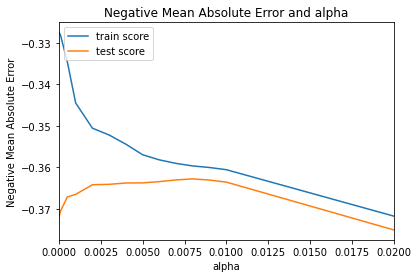

In [412]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

ax = plt.gca()
ax.set_xlim(0, 0.02)

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [413]:
# get optimal lambda for Lasso
model_cv.best_params_["alpha"]

0.008

In [414]:
# Get Lasso coeffs for optimal lambda
alpha = model_cv.best_params_["alpha"]

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe2, y_train) 

lasso.coef_

array([ 0.24570594,  0.03364658,  0.        , -0.08895605,  0.48038164,
        0.65553975,  0.73099025, -0.        , -0.        , -0.33847721,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.3733283 ,  0.        ])

In [415]:
# train and test data R2 score
Lasso_train_score = lasso.score(X_train_rfe2, y_train)
print("Lasso_train_score: ", Lasso_train_score)

# Subsetting training data for selected columns
Lasso_test_score = lasso.score(X_test_rfe2, y_test)
print("Lasso_test_score: ", Lasso_test_score)

Lasso_train_score:  0.6866566775155172
Lasso_test_score:  0.7102037529021302


In [423]:
# print top features using Lasso regression for optimal lamda
sorted_index = sortTopFeaturesinDescendingOrder(list(lasso.coef_))
print(sorted_index)
print(col1[sorted_index])

[6, 4, 5, 0, 28, 9, 3, 1, 29, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 8, 7, 2]
Index(['Neighborhood_NridgHt', 'GrLivArea', 'Neighborhood_NoRidge',
       'TotalBsmtSF', 'SaleType_New', 'BldgType_Duplex', 'LowQualFinSF',
       '1stFlrSF', 'SaleCondition_Partial', 'Functional_Sev', 'Functional_Mod',
       'Heating_OthW', 'BsmtFinType2_None', 'BsmtFinType1_None',
       'Exterior2nd_Other', 'Exterior2nd_CBlock', 'Exterior2nd_AsphShn',
       'Exterior1st_CBlock', 'Exterior1st_AsphShn', 'RoofMatl_WdShngl',
       'RoofMatl_WdShake', 'RoofMatl_Tar&Grv', 'RoofMatl_Roll',
       'RoofMatl_Metal', 'RoofMatl_Membran', 'RoofMatl_CompShg',
       'RoofStyle_Shed', 'Condition2_RRAe', 'Condition2_PosN', '2ndFlrSF'],
      dtype='object')

# Check the model changes for the double value of Optimal lambda

In [417]:
# Get Lasso coeffs for double the value of optimal lambda
alpha = 2*model_cv.best_params_["alpha"]

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe2, y_train) 

lasso.coef_

array([ 2.79880820e-01,  8.73917464e-03,  0.00000000e+00, -8.49283347e-02,
        4.98462911e-01,  3.52194912e-01,  5.85858885e-01, -0.00000000e+00,
       -0.00000000e+00, -1.43177300e-01, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        2.71604168e-01,  1.44553162e-16])

In [418]:
# train and test data R2 score for double the value of optimal lamda
Lasso_train_score = lasso.score(X_train_rfe2, y_train)
print("Lasso_train_score: ", Lasso_train_score)

# Subsetting training data for selected columns
Lasso_test_score = lasso.score(X_test_rfe2, y_test)
print("Lasso_test_score: ", Lasso_test_score)

Lasso_train_score:  0.6693265513010715
Lasso_test_score:  0.6997984706483087


In [419]:
# print top features using Lasso regression for double the value of optimal lamda
sorted_index = sortTopFeaturesinDescendingOrder(list(lasso.coef_))
print(sorted_index)
print(col1[sorted_index])

[6, 4, 5, 0, 28, 9, 3, 1, 29, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 8, 7, 2]
Index(['Neighborhood_NridgHt', 'GrLivArea', 'Neighborhood_NoRidge',
       'TotalBsmtSF', 'SaleType_New', 'BldgType_Duplex', 'LowQualFinSF',
       '1stFlrSF', 'SaleCondition_Partial', 'Functional_Sev', 'Functional_Mod',
       'Heating_OthW', 'BsmtFinType2_None', 'BsmtFinType1_None',
       'Exterior2nd_Other', 'Exterior2nd_CBlock', 'Exterior2nd_AsphShn',
       'Exterior1st_CBlock', 'Exterior1st_AsphShn', 'RoofMatl_WdShngl',
       'RoofMatl_WdShake', 'RoofMatl_Tar&Grv', 'RoofMatl_Roll',
       'RoofMatl_Metal', 'RoofMatl_Membran', 'RoofMatl_CompShg',
       'RoofStyle_Shed', 'Condition2_RRAe', 'Condition2_PosN', '2ndFlrSF'],
      dtype='object')


# Lasso Regression after dropping five important predictor variables


In [433]:
#top5 = ['Condition2_PosN', 'RoofMatl_WdShngl', 'Neighborhood_NoRidge','Neighborhood_NridgHt', 'GrLivArea']
top5 = ['Neighborhood_NridgHt', 'GrLivArea', 'Neighborhood_NoRidge','TotalBsmtSF', 'SaleType_New']
# Subsetting training data after dropping five important predictor variables
list_temp = list(col1)
for x in top5:
    list_temp.remove(x)
    
X_train_rfe3 = X_train[list_temp]

# Lasso is making coeffs zero for alpha > 0.5
params = {'alpha': [0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005,
                   0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
                    0.009, 0.01, 0.02]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe3, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.006,
                                   0.007, 0.008, 0.009, 0.01, 0.02]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [434]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038593,0.021400,0.008200,0.001935,0.000001,{'alpha': 1e-06},-0.390137,-0.417170,-0.463016,-0.428875,...,-0.420016,0.025276,17,-0.372191,-0.377456,-0.371124,-0.377084,-0.372910,-0.374153,0.002610
1,0.018700,0.010487,0.000000,0.000000,0.000005,{'alpha': 5e-06},-0.390100,-0.416904,-0.462908,-0.428786,...,-0.419920,0.025245,16,-0.372240,-0.377497,-0.371152,-0.377106,-0.372968,-0.374193,0.002606
2,0.041659,0.021162,0.031783,0.050128,0.00001,{'alpha': 1e-05},-0.390054,-0.416769,-0.462774,-0.428674,...,-0.419838,0.025203,15,-0.372302,-0.377548,-0.371186,-0.377135,-0.373041,-0.374242,0.002602
3,0.016225,0.000707,0.004785,0.000433,0.00005,{'alpha': 5e-05},-0.389683,-0.416710,-0.461709,-0.427780,...,-0.419395,0.024842,13,-0.372826,-0.377954,-0.371475,-0.377364,-0.373628,-0.374650,0.002559
4,0.014604,0.002001,0.005351,0.000788,0.0001,{'alpha': 0.0001},-0.389250,-0.416647,-0.460423,-0.426665,...,-0.418865,0.024401,12,-0.373488,-0.378462,-0.371854,-0.377656,-0.374384,-0.375169,0.002508


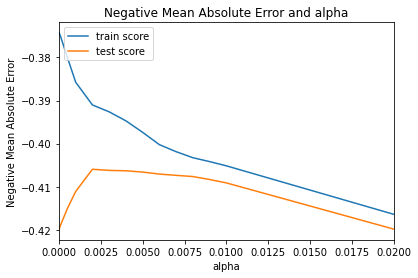

In [435]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

ax = plt.gca()
ax.set_xlim(0, 0.02)

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [436]:
# get optimal lambda for Lasso
model_cv.best_params_["alpha"]

0.002

In [437]:
# Get Lasso coeffs for optimal lambda
alpha = model_cv.best_params_["alpha"]

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe3, y_train) 

lasso.coef_

array([ 0.67906581,  0.44154158, -0.06045622, -3.10889119, -0.        ,
       -0.63793716,  0.        ,  0.42746988,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  1.46352717, -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.32234917,
       -0.        , -0.        , -0.46848089, -0.        ,  0.6278798 ])

In [438]:
# train and test data R2 score
Lasso_train_score = lasso.score(X_train_rfe3, y_train)
print("Lasso_train_score: ", Lasso_train_score)

# Subsetting training data for selected columns
X_test_rfe3 = X_test[list_temp]
Lasso_test_score = lasso.score(X_test_rfe3, y_test)
print("Lasso_test_score: ", Lasso_test_score)

Lasso_train_score:  0.6572366240061381
Lasso_test_score:  0.6422073323852456


In [439]:
# print top features using Lasso regression for optimal lamda after removing top5
sorted_index = sortTopFeaturesinDescendingOrder(list(lasso.coef_))
print(sorted_index)

for i in range(5):
    print(list_temp[i])

[3, 13, 0, 5, 24, 22, 1, 7, 19, 2, 23, 21, 20, 18, 17, 16, 15, 14, 12, 11, 10, 9, 8, 6, 4]
1stFlrSF
2ndFlrSF
LowQualFinSF
Condition2_PosN
Condition2_RRAe


# Observations


The Optimal value of lambda with Ridge regression is 10.0.



The Optimal value of lambda with Lasso regression is 0.008.


OLS linear regression is slightly overfitted which is regularized using Ridge and Lasso models

Both Ridge and Lasso has similar performance with training and test data, Lasso is a simpler model with less number of features(17) due to feature selection compared to Ridge(30)